In [1]:
import pandas as pd
import numpy as np
import random as rnd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('911_1.csv')

Analyze the data

In [3]:
print(df.columns.values)

['lat' 'lng' 'desc' 'zip' 'title' 'timeStamp' 'twp' 'addr' 'e']


In [4]:
print('Rows      :',df.shape[0])
print('Columns   :',df.shape[1])

Rows      : 663522
Columns   : 9


In [5]:
#preview the data
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [6]:
df= df.drop('e',axis=1)

In [7]:
# missing values
print('Missing Values: ',df.isnull().values.sum())

df.isnull().sum()

Missing Values:  80492


lat              0
lng              0
desc             0
zip          80199
title            0
timeStamp        0
twp            293
addr             0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        663522 non-null  float64
 1   lng        663522 non-null  float64
 2   desc       663522 non-null  object 
 3   zip        583323 non-null  float64
 4   title      663522 non-null  object 
 5   timeStamp  663522 non-null  object 
 6   twp        663229 non-null  object 
 7   addr       663522 non-null  object 
dtypes: float64(3), object(5)
memory usage: 40.5+ MB


In [9]:
df['zip'].nunique()

204

The top 5 zip codes for 911 calls

In [10]:
df_zip = pd.DataFrame(df['zip'].value_counts().head(5))
df_zip.rename(columns = {'zip':'Top 5'},inplace = True)
df_zip.style.background_gradient(cmap='Blues')

,Top 5
19401.000000,45606
19464.000000,43910
19403.000000,34888
19446.000000,32270
19406.000000,22464


The top 5 townships(twp) for 911 Calls

In [12]:
df_twp = pd.DataFrame(df['twp'].value_counts().head(5))
df_twp.rename(columns = {'twp':'Top 5'},inplace= True)
df_twp.style.background_gradient(cmap='Greens')

,Top 5
LOWER MERION,55490
ABINGTON,39947
NORRISTOWN,37633
UPPER MERION,36010
CHELTENHAM,30574


The amount of unique titles of emergency codes

In [13]:
df['title'].nunique()

148

Creating a new column, to seperate the column for reason, with ems.  so the reason wont so up as EMS, but instead would be the actual call reason

In [14]:
df['reason'] = df['title'].apply(lambda title: title.split(':')[0])

using the same method from above, we are going to create a column with just the title code

In [15]:
df['title_code'] = df['title'].apply(lambda title: title.split(':')[1])

# Exploratory Data Analysis

In [16]:
df['reason'].value_counts()

EMS        332692
Traffic    230208
Fire       100622
Name: reason, dtype: int64

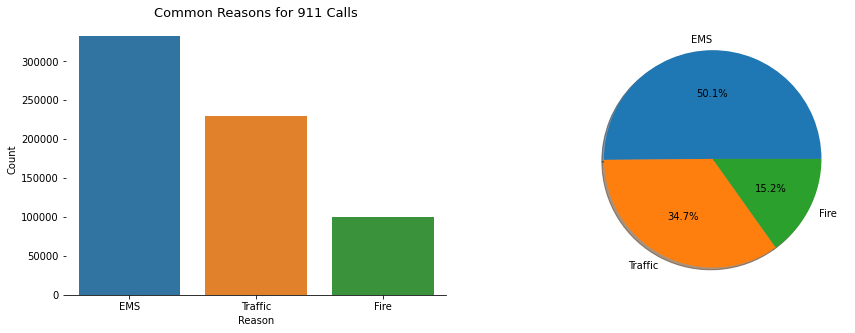

In [19]:
fig,axes = plt.subplots(1,2, figsize=(15,5))

sns.countplot(x='reason', data=df, order=df['reason'].value_counts().index, ax=axes[0])
axes[0].set_title('Common Reasons for 911 Calls', size= 13)
axes[0].set(xlabel='Reason', ylabel='Count')

df['reason'].value_counts().plot.pie(autopct='%1.1f%%',ax=axes[1],shadow=True)
axes[1].set(xlabel =' ',ylabel= ' ')

sns.despine(bottom=False,left=True)

# Top 10 Overall Emergency Calls

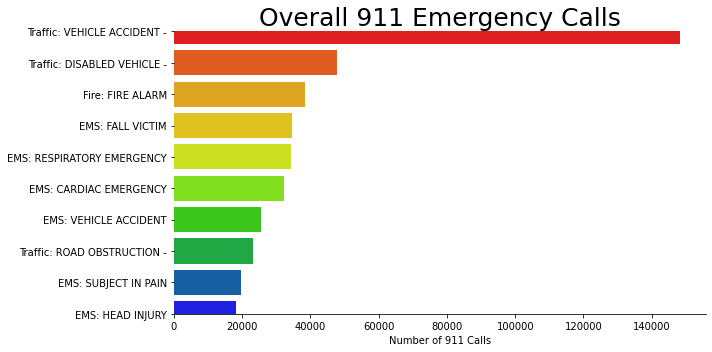

In [29]:
fig, axes = plt.subplots(figsize=(10,5))
sns.countplot(y='title', data=df, order=df['title'].value_counts().index, palette='prism')
sns.despine(bottom=False, left=True)
axes.set_ylim([9,0])
axes.set_title('Overall 911 Emergency Calls', size= 25)
axes.set(xlabel = 'Number of 911 Calls', ylabel= '')
plt.tight_layout()

# Traffic 911 emergency calls

Text(0.5, 1.0, 'Traffic 911 Emergency Calls')

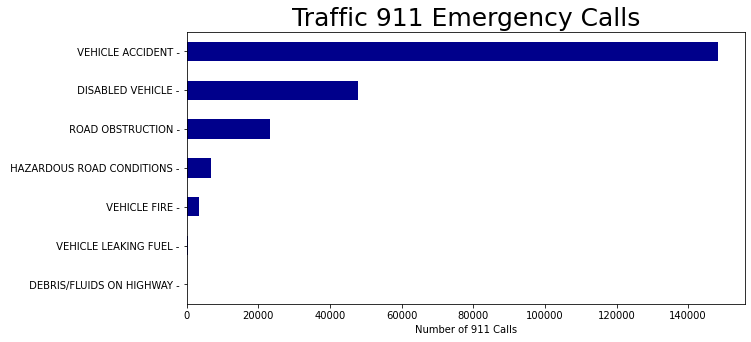

In [24]:
df[df['reason'] == 'Traffic'].groupby('title_code').count()['lat'].sort_values(ascending=True).plot(kind='barh',figsize=(10, 5),color='darkblue')
plt.xlabel('Number of 911 Calls')
plt.ylabel('')
plt.title('Traffic 911 Emergency Calls', fontsize=25)

# Fire 911 Emergency Calls

Text(0.5, 1.0, 'Fire 911 Emergency Calls')

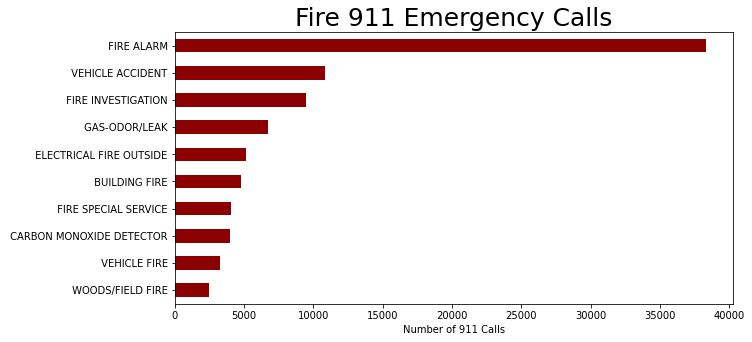

In [23]:
df[df['reason']=='Fire'].groupby('title_code').count()['lat'].sort_values(ascending=True).tail(10).plot(kind='barh', figsize=(10,5),color='darkred')
plt.xlabel('Number of 911 Calls')
plt.ylabel('')
plt.title('Fire 911 Emergency Calls', fontsize= 25)

# EMS 911 Emergency Calls

Text(0.5, 1.0, 'EMS 911 Emergency Calls')

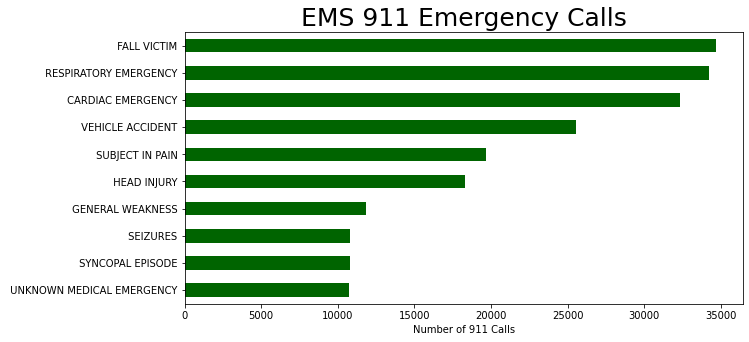

In [28]:
df[df['reason']=='EMS'].groupby('title_code').count()['lat'].sort_values(ascending=True).tail(10).plot(kind='barh', figsize=(10,5),color='darkgreen')
plt.xlabel('Number of 911 Calls')
plt.ylabel('')
plt.title('EMS 911 Emergency Calls', fontsize= 25)

Performing TimeStamp Feature to create 3 new columns called Hour, Month, and Day of Week.

In [30]:
df['timeStamp']= pd.to_datetime(df['timeStamp'])

df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)
df['Month'] = df['timeStamp'].apply(lambda time: time.month)
df['Day of Week']= df['timeStamp'].apply(lambda time: time.dayofweek)

Now we have to map the actual string names to the day of the week, due to them actually being integers  0-6.

In [31]:
dmap ={0:'Mon',1:'Tues',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

df['Day of Week'] = df['Day of Week'].map(dmap)

# Weekly and monthly calls

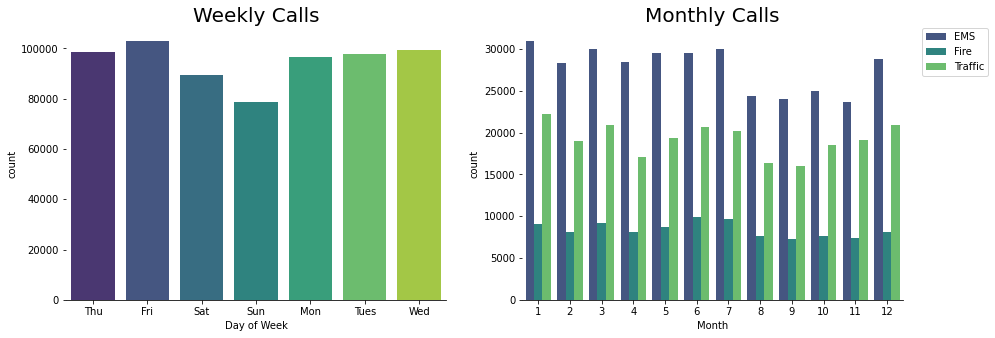

In [36]:
fig, axes = plt.subplots(1,2,figsize =(15,5))

sns.countplot(x='Day of Week', data=df, palette='viridis', ax=axes[0])
axes[0].set_title('Weekly Calls', size=20)

sns.countplot(x='Month', data=df, hue='reason', palette='viridis', ax=axes[1])
axes[1].set_title('Monthly Calls', size=20)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

sns.despine(bottom=False, left=True)

Now we are creating a new column called 'Date' that contains the date from the timeStamp column.

In [37]:
df['Date']=df['timeStamp'].apply(lambda t: t.date())

Now we will use groupby to the date column with count() aggregate and create a plot of counts of 911 calls.

# Traffic

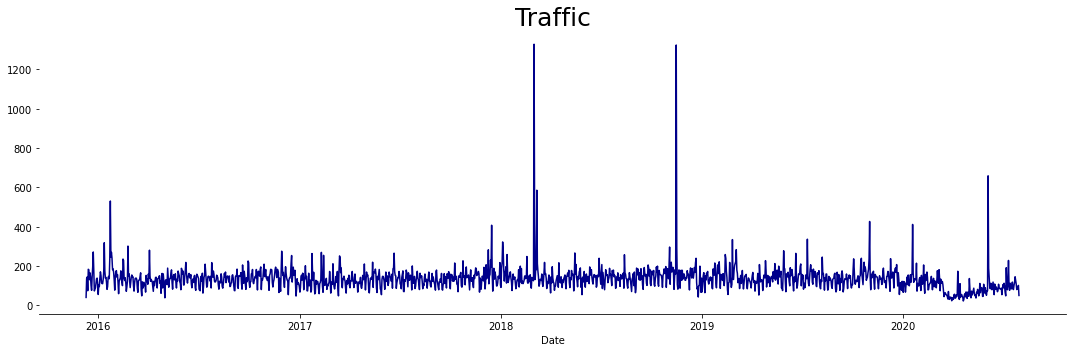

In [39]:
df[df['reason']=='Traffic'].groupby('Date').count()['lat'].plot(figsize=(15,5),color='darkblue')
plt.title('Traffic', fontsize=25)
sns.despine(bottom=False, left=True)
plt.tight_layout()

# Fire

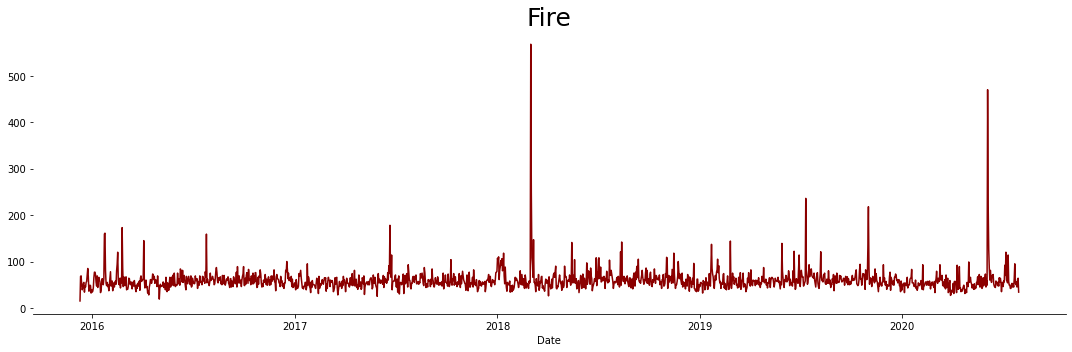

In [40]:
df[df['reason']=='Fire'].groupby('Date').count()['lat'].plot(figsize=(15,5), color='darkred')
plt.title('Fire', fontsize=25)
sns.despine(bottom=False, left=True)
plt.tight_layout()

# EMS

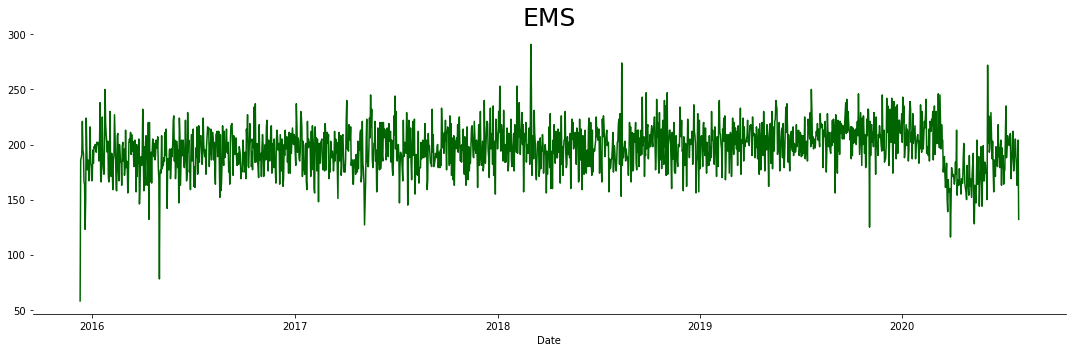

In [42]:
df[df['reason']=='EMS'].groupby('Date').count()['lat'].plot(figsize=(15,5), color='darkgreen')
plt.title('EMS', fontsize=25)
sns.despine(bottom=False, left=True)
plt.tight_layout()

# Heatmap

In [43]:
dayHour = df.groupby(by=['Day of Week','Hour']).count()['reason'].unstack()

<AxesSubplot:xlabel='Hour', ylabel='Day of Week'>

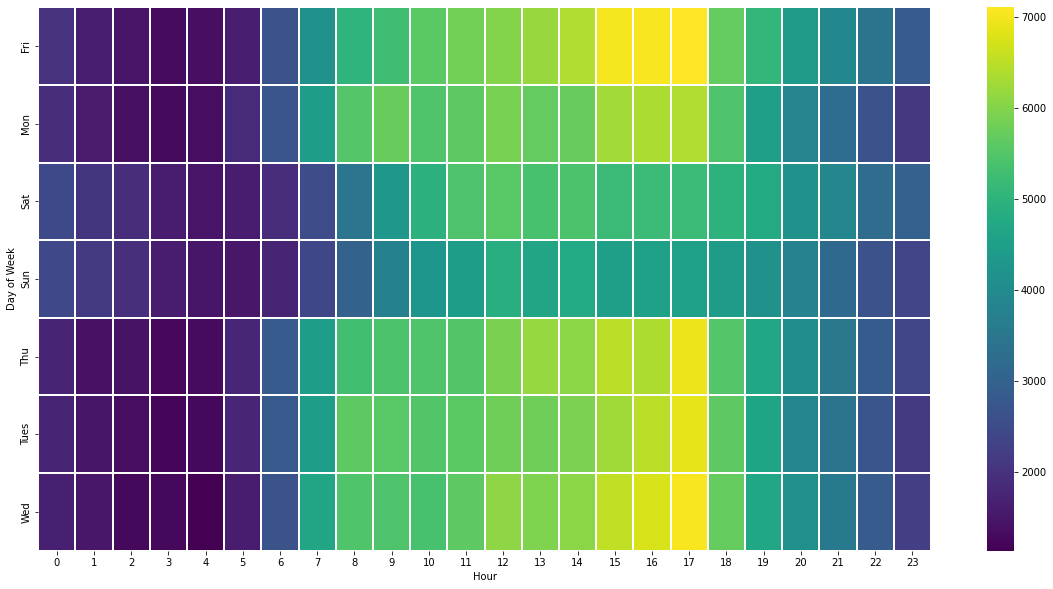

In [44]:
plt.figure(figsize=(20,10))
sns.heatmap(dayHour, cmap='viridis', linewidth=0.05)

# Clustermap

<Figure size 1440x720 with 0 Axes>

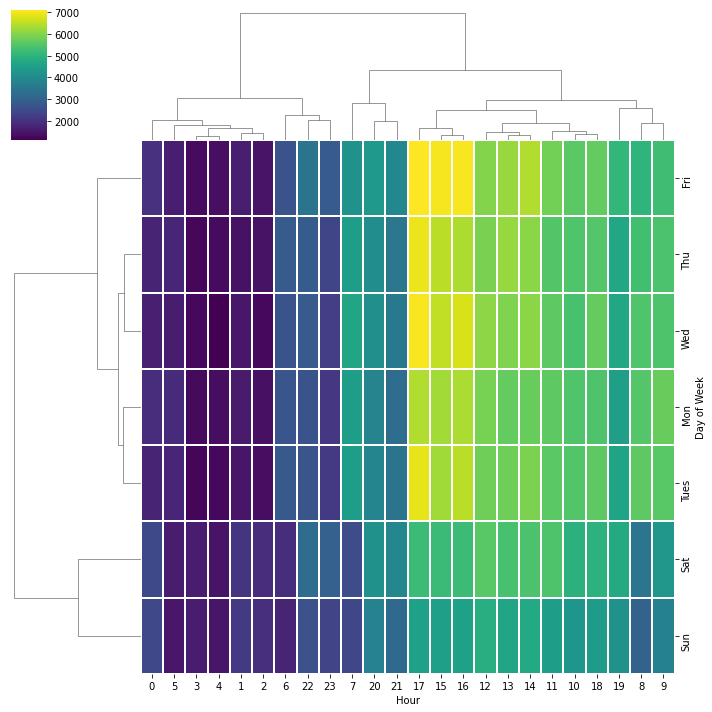

In [46]:
plt.figure(figsize=(20,10))
sns.clustermap(dayHour, cmap='viridis', linewidths=0.05)